###Linear Regression using only numpy

In [ ]:
import numpy as np

###Creation of data and labels 
Linerar relation : y = mx + q

In [ ]:
X = np.random.rand(10000,5)
m = np.random.randint(low = 1, high = 20,size = (5,1))  #parametri random tra low e high
q = np.random.rand(1)
y = (X @ m) + q 

noise = np.random.randn(y.shape[0], y.shape[1])
y = y + noise

X.shape, m.shape, q.shape, y.shape

((10000, 5), (5, 1), (1,), (10000, 1))

q might be interpreted as a parameter within the m vector.

y = m1x1 + m2x2 + m3x3 + m4x4 + m5x5 + m6x6

Provided that x6 is always equal to one. We then add another column of "1" to the data and put q at the end of the vector m.

In [ ]:
X = np.concatenate([X , np.ones((X.shape[0],1))], axis = 1)
m = np.concatenate([m,q.reshape(1,-1)],axis = 0)

X.shape, m.shape

((10000, 6), (6, 1))

In [ ]:
def partial_derivative(X_batch, y_batch, m_stat):

  y_pred = X_batch @ m_stat
  n = len(X_batch)

  df_dm =  (-2/n) * (X_batch.T @ (y_batch - y_pred))
  df_dm = df_dm.reshape(len(df_dm),-1)

  return df_dm


def mean_squared_error(X,y,m_stat):
  y_pred = X @ m_stat
  mse = np.sum(((y_pred - y)**2),axis = 0) / len(X)
  
  return mse

  

def training(X, y, batch_size, lr, epochs):
  
  for epoch in range(epochs):

    #random initial statistics
    if epoch == 0:
      m_stat = np.random.rand(X.shape[1],1)

    #shuffle X and y using same permutation
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    X = X[indices]
    y = y[indices]

    #store comulative derivative
    cumulative_derivative = np.zeros((X.shape[1],1))

    for batch in range(len(X)//batch_size):
      start = batch*batch_size
      stop = (batch*batch_size) + batch_size

      X_batch = X[start:stop]
      y_batch = y[start:stop]
      
      #derivative
      cumulative_derivative = cumulative_derivative + partial_derivative(X_batch, y_batch, m_stat)

      #updating rule
      m_stat = m_stat - (lr*cumulative_derivative)
    
    print(f"epoch: {epoch} ----> MSE: {mean_squared_error(X,y,m_stat)}")
      
  return m_stat



We use the training function to find the "hidden" parameters

In [ ]:
batch_size = 1024
lr = 0.01
epochs = 500

m_stat = training(X,y, batch_size,lr,epochs)

Lets print the real and estimated parameters to see if they are equal (similar)



In [ ]:
print(m_stat,"\n")
print(m)

[[ 7.02023943]
 [12.92578848]
 [ 7.97939421]
 [ 0.97164595]
 [ 2.06477057]
 [ 0.59971073]] 

[[ 7.        ]
 [13.        ]
 [ 8.        ]
 [ 1.        ]
 [ 2.        ]
 [ 0.59567936]]


Lets create a test set, and try to predict the label using the hyperplane we just found

In [ ]:
X_test = np.random.rand(500,5)
X_test = np.concatenate([X_test,np.ones(shape = (500,1))] , axis = 1)
y_test = X_test @ m

I make my expeditions with the "found" parameters

In [ ]:
y_preds = X_test @ m_stat

I calculate the MSE and notice that it is low

In [ ]:
mean_squared_error(X_test, y_test, m_stat)

array([0.00044625])

If I compare some of the real outputs with those of the prediction I notice that they are very similar

In [ ]:
y_test[:5]

array([[55.68984025],
       [27.89823867],
       [54.46623722],
       [29.61535891],
       [56.02561976]])

In [ ]:
y_preds[:5]

array([[55.69776397],
       [27.85997063],
       [54.46251329],
       [29.58735955],
       [56.04068571]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = np.random.rand(100)
y = 10*X + 5 
y = y + np.random.randn(100)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

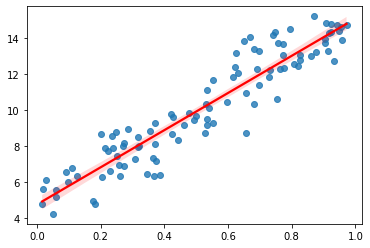

In [ ]:
sns.regplot(X,y,line_kws={"color": "red"},)